In [88]:
import seaborn as sns
import pandas as pd

In [89]:
df = pd.read_csv('training_set_fd.csv', sep=';')
df.head()

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


17998
claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64
Axes(0.125,0.11;0.775x0.77)


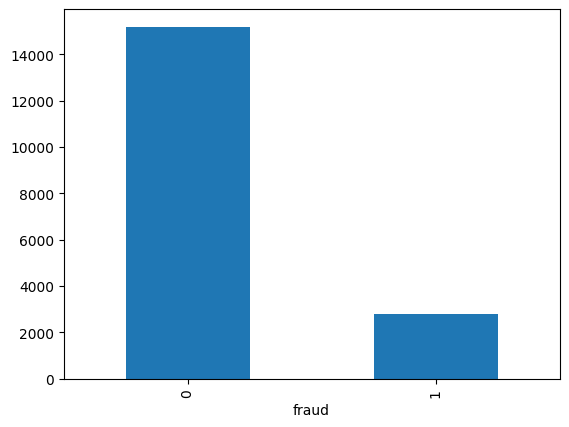

In [90]:
print(df.shape[0])
print(df.isna().sum())
print(df['fraud'].value_counts().plot.bar())

<Axes: xlabel='age_of_driver', ylabel='Count'>

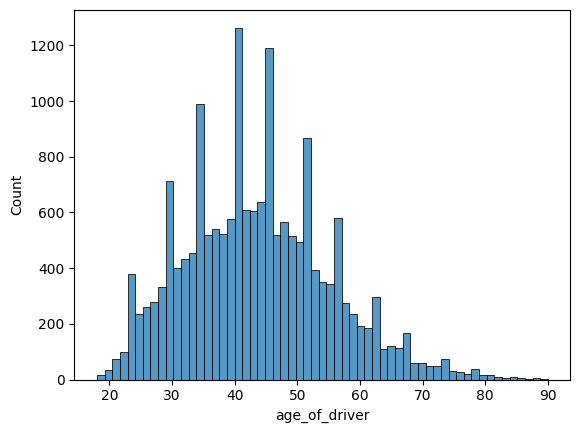

In [91]:
df_age = df[df['age_of_driver'] < 91]
sns.histplot(df_age, x='age_of_driver')

array([<Axes: ylabel='1'>], dtype=object)

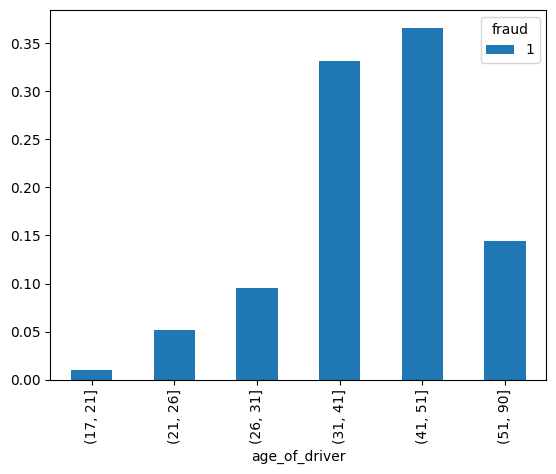

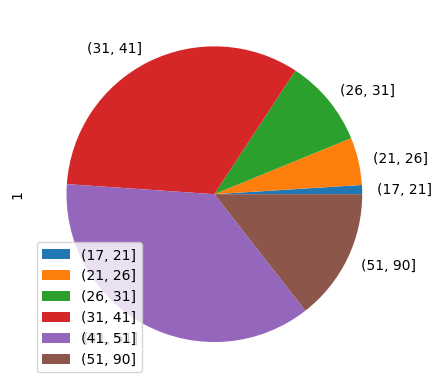

In [92]:
bins = [17,21,26,31,41,51,90]

df_age['age_of_driver'] = pd.cut(df['age_of_driver'], bins=bins)

new_df = df_age[df_age['fraud'] == 1]
(new_df.groupby(['age_of_driver','fraud']).size()/(new_df.shape[0])).unstack().plot.bar()
(new_df.groupby(['age_of_driver','fraud']).size()/(new_df.shape[0])).unstack().plot.pie(subplots=True)

over 40


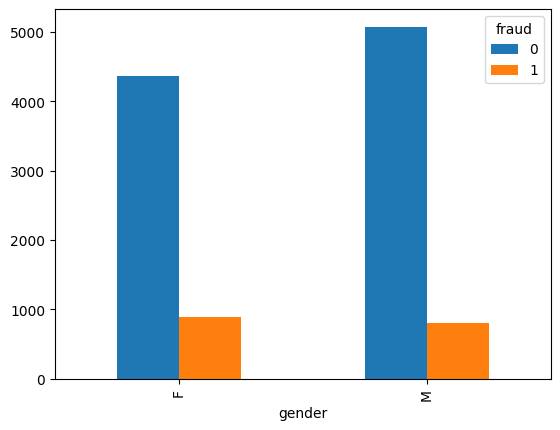

under 40


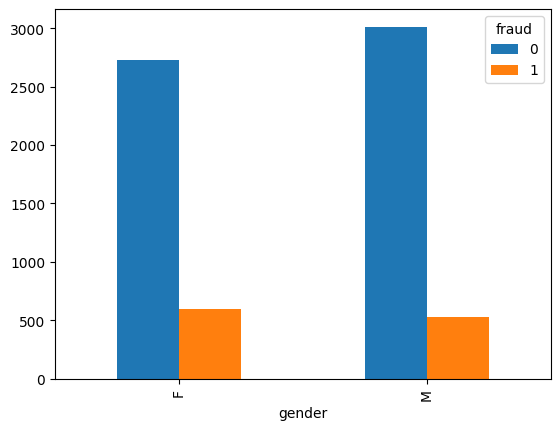

In [93]:
import matplotlib.pyplot as plt

df_over = df[df['age_of_driver'] >= 40]
df_under = df[df['age_of_driver'] < 40]

print ("over 40")
df_over.groupby(['gender','fraud']).size().unstack().plot.bar()
plt.show()
print ("under 40")
df_under.groupby(['gender','fraud']).size().unstack().plot.bar()
plt.show()


<Axes: xlabel='claim_est_payout', ylabel='Count'>

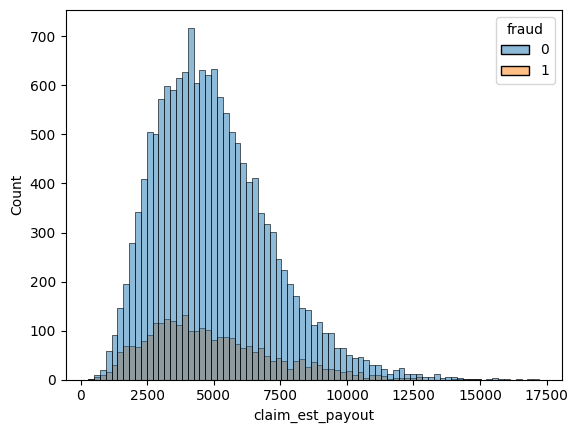

In [94]:
df_fraud = df[df['fraud'] == 1]

sns.histplot(df, x='claim_est_payout', hue='fraud')

Predizione decision tree Test: 0.22320441988950276 Train: 1.0


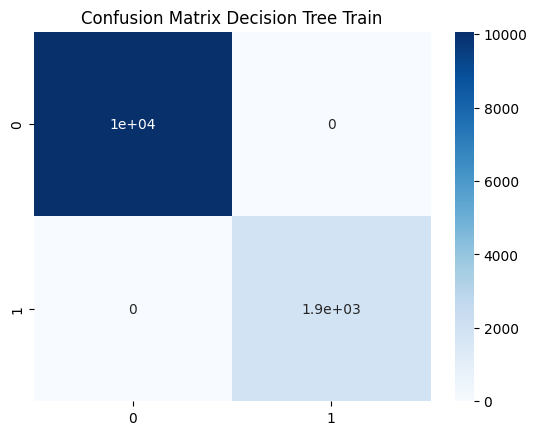

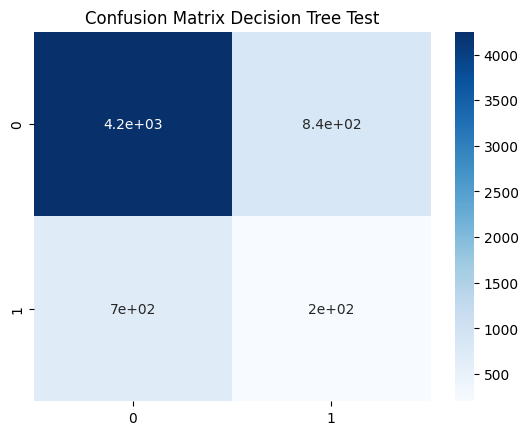

Predizione decision logistic Test: 0.017679558011049725 Train: 0.023597273203985317


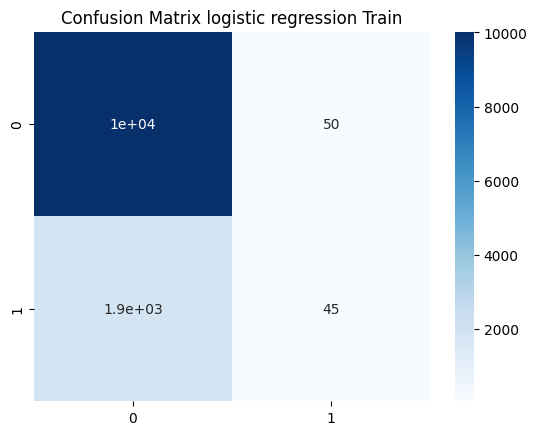

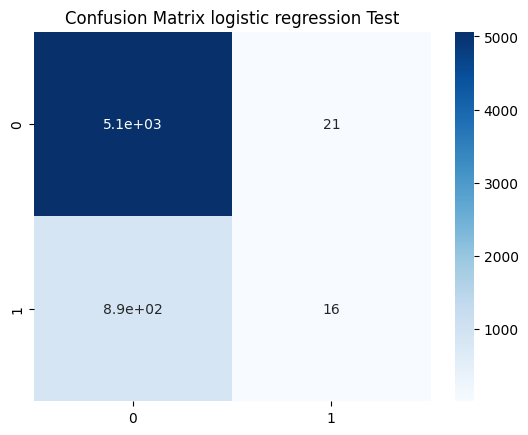

Predizione decision dummy Test: 0.0 Train: 0.0


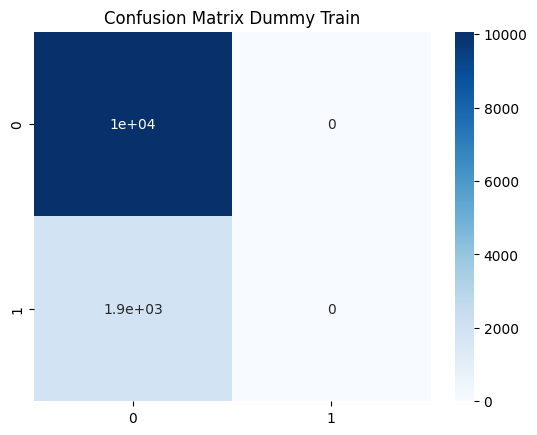

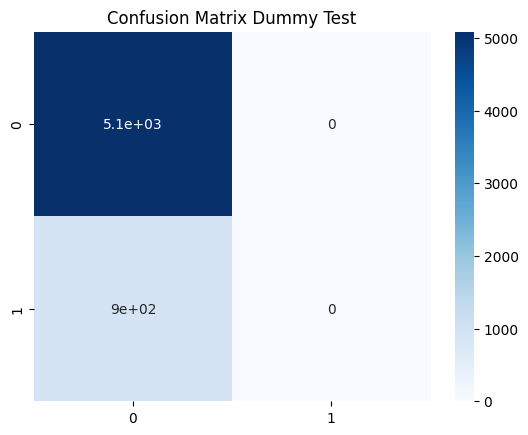

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv('training_set_fd.csv', sep=';')

df = df.drop('claim_number', axis=1)

#elimina righe con valori mancanti
#df.dropna()



enc = OrdinalEncoder()
temp = enc.fit_transform(df)
df = pd.DataFrame(temp, columns=df.columns)

df = df.dropna()

y = df['fraud']
X = df.drop('fraud', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {recall_score(y_test, test_pred)} Train: {recall_score(y_train, train_pred)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Test')
plt.show()

logre = LogisticRegression()

logre.fit(X_train, y_train)

test_pred1 = logre.predict(X_test)
train_pred1 = logre.predict(X_train)
print(f'Predizione decision logistic Test: {recall_score(y_test, test_pred1)} Train: {recall_score(y_train, train_pred1)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix logistic regression Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix logistic regression Test')
plt.show()

dummy = DummyClassifier()

dummy.fit(X_train, y_train)

test_pred2 = dummy.predict(X_test)
train_pred2 = dummy.predict(X_train)
print(f'Predizione decision dummy Test: {recall_score(y_test, test_pred2)} Train: {recall_score(y_train, train_pred2)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Test')
plt.show()


In [96]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=10, scoring='recall').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logre, X, y, cv=10, scoring='recall').mean())
print('Accuracy Dummy con Cross Val ',cross_val_score(dummy, X, y, cv=10, scoring='recall').mean())

Accuracy Decision Tree con Cross Val  0.24075616466015498
Accuracy Logistic Regression con Cross Val  0.009593397440751116
Accuracy Dummy con Cross Val  0.0


In [97]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [1,2,3],
    'penalty': ['l1','l2','elasticnet', None]
}

par = GridSearchCV(logre, params, scoring='accuracy')

par.fit(X_train, y_train)

pred = par.predict(X_test)

print(par.best_params_)
print('Accuracy tree test:' , accuracy_score(y_test, pred))




{'C': 3, 'penalty': 'l2'}
Accuracy tree test: 0.8474123539232054


In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, MaxAbsScaler
from sklearn.pipeline import Pipeline


trans = ColumnTransformer(transformers=[('kbin', KBinsDiscretizer(), ['claim_est_payout','vehicle_price'])])

pipe = Pipeline(steps=[('trans', trans),
                       ('maxAbs', MaxAbsScaler())])

pipe.fit(X,y)

pipeline = Pipeline(steps=[('prepo', pipe),
                           ('model', DecisionTreeClassifier())])



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

pipeline.fit(X_train,y_train)
test_pred = pipeline.predict(X_test)


print('Accuracy tree test:' , accuracy_score(y_test, test_pred))

pipeline1 = Pipeline(steps=[('prepo', pipe),
                           ('model', LogisticRegression())])



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

pipeline1.fit(X_train,y_train)
test_pred = pipeline.predict(X_test)


print('Accuracy logistic test:' , accuracy_score(y_test, test_pred))


Accuracy tree test: 0.8459098497495826
Accuracy logistic test: 0.8430717863105175


In [104]:
trans = ColumnTransformer(transformers=[('kbin', KBinsDiscretizer(n_bins=10), ['claim_est_payout','vehicle_price'])])


temp = trans.fit_transform(X,y)
print(temp)
df_temp = pd.DataFrame(temp, columns=['claim_est_payout','vehicle_price'])

df_temp

  (0, 8)	1.0
  (0, 11)	1.0
  (1, 1)	1.0
  (1, 17)	1.0
  (2, 7)	1.0
  (2, 15)	1.0
  (3, 7)	1.0
  (3, 12)	1.0
  (4, 4)	1.0
  (4, 18)	1.0
  (5, 6)	1.0
  (5, 13)	1.0
  (6, 9)	1.0
  (6, 16)	1.0
  (7, 9)	1.0
  (7, 11)	1.0
  (8, 7)	1.0
  (8, 19)	1.0
  (9, 6)	1.0
  (9, 14)	1.0
  (10, 9)	1.0
  (10, 16)	1.0
  (11, 7)	1.0
  (11, 10)	1.0
  (12, 4)	1.0
  :	:
  (17955, 10)	1.0
  (17956, 7)	1.0
  (17956, 10)	1.0
  (17957, 9)	1.0
  (17957, 13)	1.0
  (17958, 7)	1.0
  (17958, 11)	1.0
  (17959, 5)	1.0
  (17959, 13)	1.0
  (17960, 0)	1.0
  (17960, 13)	1.0
  (17961, 6)	1.0
  (17961, 18)	1.0
  (17962, 8)	1.0
  (17962, 14)	1.0
  (17963, 5)	1.0
  (17963, 18)	1.0
  (17964, 3)	1.0
  (17964, 10)	1.0
  (17965, 0)	1.0
  (17965, 19)	1.0
  (17966, 9)	1.0
  (17966, 16)	1.0
  (17967, 5)	1.0
  (17967, 14)	1.0


ValueError: Shape of passed values is (17968, 1), indices imply (17968, 2)